<a href="https://colab.research.google.com/github/anika095/MU_PDS-01Anika_PDS01_Fraud-Detection-Analysis/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score

In [99]:
data=pd.read_csv('/content/drive/MyDrive/credit_card_fraud_dataset.csv')
data

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [100]:
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [101]:
data.tail()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0
99999,100000,2024-03-05 19:41:36.027606,1596.79,675,refund,Houston,0


In [102]:
print(data.describe())

       TransactionID         Amount     MerchantID        IsFraud
count  100000.000000  100000.000000  100000.000000  100000.000000
mean    50000.500000    2497.092666     501.676070       0.010000
std     28867.657797    1442.415999     288.715868       0.099499
min         1.000000       1.050000       1.000000       0.000000
25%     25000.750000    1247.955000     252.000000       0.000000
50%     50000.500000    2496.500000     503.000000       0.000000
75%     75000.250000    3743.592500     753.000000       0.000000
max    100000.000000    4999.770000    1000.000000       1.000000


In [103]:
data['IsFraud'].value_counts()

,count
IsFraud,
0,99000
1,1000


In [104]:
!pip install imbalanced-learn==0.9.1

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
X = data.drop('IsFraud', axis=1)  # Features
y = data['IsFraud']  # Target variable

In [107]:

from imblearn.over_sampling import SMOTE


# 1. Identify columns with 'object' dtype (likely containing strings)
categorical_cols = data.select_dtypes(include=['object']).columns

# 2. Create a LabelEncoder object
label_encoder = LabelEncoder()

# 3. Iterate through categorical columns and encode them
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# 4. Now proceed with SMOTE
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [108]:
smote = SMOTE(random_state=42)  # Initialize SMOTE with a random state for reproducibility
X_res, y_res = smote.fit_resample(X, y)  # Resample the data

In [109]:
balanced_data = pd.DataFrame(X_res, columns=X.columns)  # Create a DataFrame from the resampled features
balanced_data['IsFraud'] = y_res  # Add the resampled target variable

In [110]:
data.shape

(100000, 7)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  int64  
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  int64  
 5   Location         100000 non-null  int64  
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 5.3 MB


In [112]:
data.isnull().sum()

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


In [113]:
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,45062,4189.27,688,1,7,0
1,2,40809,2659.71,109,1,1,0
2,3,21607,784.00,394,0,4,0
3,4,47903,3514.40,944,0,5,0
4,5,72465,369.07,475,0,6,0


In [114]:
data.tail()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
99995,99996,62739,1057.29,289,1,7,0
99996,99997,426,297.25,745,1,7,0
99997,99998,61063,3448.56,690,0,7,0
99998,99999,99204,3750.79,644,0,5,0
99999,100000,37074,1596.79,675,1,2,0


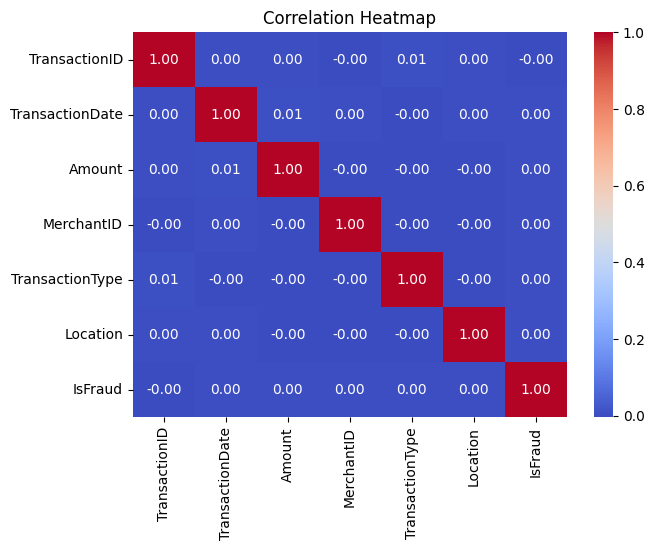

In [115]:
correlation_matrix = data.corr()


plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [116]:
X=data.drop(columns='IsFraud',axis=1)
Y=data['IsFraud']

In [117]:
X

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location
0,1,45062,4189.27,688,1,7
1,2,40809,2659.71,109,1,1
2,3,21607,784.00,394,0,4
3,4,47903,3514.40,944,0,5
4,5,72465,369.07,475,0,6
...,...,...,...,...,...,...
99995,99996,62739,1057.29,289,1,7
99996,99997,426,297.25,745,1,7
99997,99998,61063,3448.56,690,0,7
99998,99999,99204,3750.79,644,0,5


In [118]:
Y

,IsFraud
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [119]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [120]:
model=LogisticRegression()

In [121]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.9902

In [123]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy


0.9895333333333334

In [124]:
precision_score(X_train_prediction,Y_train)

0.0

In [125]:
#f1 score
f1_score(X_train_prediction,Y_train)


0.0

In [126]:

y_pred = model.predict(X_test)

r2 = r2_score(Y_test, y_pred)
print(r2)

-0.010577376541130556


In [127]:

mse = mean_squared_error(Y_test, X_test_prediction)
mse

0.010466666666666668

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your original feature data
scaler = StandardScaler() # Creating a scaler object
X_scaled = scaler.fit_transform(X) # Scaling the data and assigning it to X_scaled

scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

Cross-Validation R² Scores: [-0.01010101 -0.01010101 -0.01010101 -0.01010101 -0.01010101]
Mean Cross-Validation R² Score: -0.010101010101010255


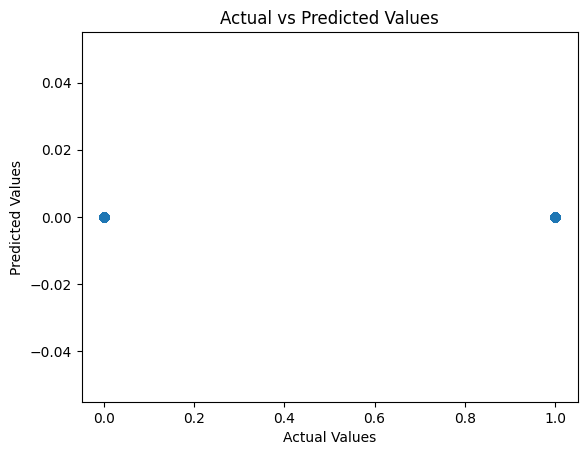

In [129]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
